# Project Description

Write a brief description of your project here. 

Note that projects should be self-sufficient, so make sure to provide enough information and context here for someone to understand what you are doing in your project, and why. 

My project is taking a dataset from the WHO on covid deaths and vaccinations around the world. There are lots of missing data/Nas in the dataset that I will be getting rid of prior to running my functions. My functions aim to do some basic statistical analysis on the dataset and create some graphs. This includes ranking the values in each column of the dataset, taking basic statistics on them (mean, max, min, quartiles, SD), taking a ttest on any two columns in the dataset, creating a scattermatrix of the dataset, creating a histogram of any column in the dataset, creating a pie chart of any column in the dataset, and creating a bar graph of any column in the dataset. 

## Project Code

If it makes sense for your project, you can have code and outputs here in the notebook as well.

In [1]:
#importing packages
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WHO_COVID_19.csv")

In [3]:
df.head()

,country,cases_total,cases_total_per_100000_pop,cases_7_days,cases_7_days_per_100000_pop,cases_24_hours,deaths_total,deaths_total_per_100000_pop,deaths_7_days,deaths_7_days_per_100000_pop,deaths_24_hours,fully_vacc_per_100_pop
0,Global,259502031,3329.279458,3980811,51.071786,611528,5183003,66.4953,52000,0.667134,7881,NaN
1,United States of America,47802459,14441.715000,666617,201.393000,100455,771529,233.0880,10338,3.123000,1367,NaN
2,India,34555431,2504.009000,65808,4.769000,10549,467468,33.8740,2386,0.173000,488,29.924
3,Brazil,22043112,10370.330000,65451,30.792000,12930,613339,288.5490,1488,0.700000,273,58.523
4,The United Kingdom,10021501,14762.249000,299581,441.300000,46654,144433,212.7580,874,1.287000,147,67.835


In [4]:
#drop NAs 
#adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#used as data parameter for functions 
dropped_na_df = df.dropna()


#create datafrmae same as dropped_na_df but with index as country
#will be used as dataset parameter for rank_data
#adapted from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
dropped_na_df_index_country = dropped_na_df.set_index('country')

#create rank_df with country as index (will be used as
#ranked_dataset parameter for rank_data)
#adapted from module 16
rank_df = pd.DataFrame(index = dropped_na_df['country'])

#create dataframe with only column as country for ranked df in 
#used as data parameter for functions ranking a specirfic column
#rank_df_col = dropped_na_df[['country']]
#rank_df_specific = rank_df_col.copy()

In [5]:
from functions import rank_data
from functions import stats_covid_data
from functions import ttest
from functions import scatter_matrix
from functions import histogram
from functions import pie_chart
from functions import bar_graph


# Create a ranked list of each column of the dataframe

In [6]:
# test it out
rank_data(dataset = dropped_na_df_index_country,
         ranked_dataset = rank_df)

,cases_total,cases_total_per_100000_pop,cases_7_days,cases_7_days_per_100000_pop,cases_24_hours,deaths_total,deaths_total_per_100000_pop,deaths_7_days,deaths_7_days_per_100000_pop,deaths_24_hours,fully_vacc_per_100_pop
country,,,,,,,,,,,
India,21.0,9.0,19.0,8.0,18.0,20.0,9.0,20.0,9.0,20.0,6.0
Brazil,20.0,20.0,18.0,12.0,19.0,21.0,21.0,19.0,17.0,18.0,13.0
The United Kingdom,19.0,21.0,21.0,20.0,21.0,17.0,18.0,17.0,19.0,16.0,15.0
Russian Federation,18.0,16.0,20.0,19.0,20.0,18.0,17.0,21.0,21.0,21.0,9.0
Colombia,17.0,19.0,15.0,13.0,15.0,15.0,20.0,15.0,15.0,14.0,10.0
Indonesia,16.0,8.0,9.0,5.0,9.0,16.0,12.0,11.0,6.0,11.0,8.0
Mexico,15.0,11.0,14.0,10.0,17.0,19.0,19.0,16.0,16.0,19.0,11.0
South Africa,14.0,14.0,17.0,15.0,14.0,14.0,16.0,14.0,13.0,15.0,5.0
Philippines,13.0,10.0,12.0,9.0,12.0,13.0,11.0,18.0,20.0,17.0,7.0


# Take basic statistics on each column of a dataframe

In [7]:
stats_covid_data (dropped_na_df)

,cases_total,cases_total_per_100000_pop,cases_7_days,cases_7_days_per_100000_pop,cases_24_hours,deaths_total,deaths_total_per_100000_pop,deaths_7_days,deaths_7_days_per_100000_pop,deaths_24_hours,fully_vacc_per_100_pop
count,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,4.864745e+06,4336.003238,37354.428571,139.936000,5804.333333,109697.000000,85.409381,801.285714,0.643048,138.857143,46.562714
std,8.543804e+06,4094.874123,80963.075578,433.422699,12234.086972,169014.037447,92.897527,1923.122907,1.286410,284.734839,25.614328
min,6.459000e+03,8.675000,63.000000,0.015000,10.000000,4.000000,0.387000,0.000000,0.000000,0.000000,4.755000
25%,2.036500e+05,798.631000,760.000000,1.603000,118.000000,5333.000000,14.511000,11.000000,0.030000,1.000000,29.924000
50%,1.774946e+06,3003.320000,5740.000000,12.896000,759.000000,23748.000000,43.689000,82.000000,0.220000,14.000000,49.398000
75%,4.255268e+06,6511.744000,18123.000000,48.018000,2627.000000,143796.000000,151.362000,849.000000,0.658000,147.000000,68.980000
max,3.455543e+07,14762.249000,299581.000000,1982.654000,46654.000000,613339.000000,288.549000,8703.000000,5.964000,1235.000000,84.224000


# Perform a ttest on any two columns in a dataframe

In [8]:
ttest(variable_1 = 'cases_7_days_per_100000_pop', variable_2 = 'cases_total_per_100000_pop', data = dropped_na_df)

Ttest_indResult(statistic=-4.6697358184722315, pvalue=3.37003267376755e-05)

# Create a scatterplot of the dataframe

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


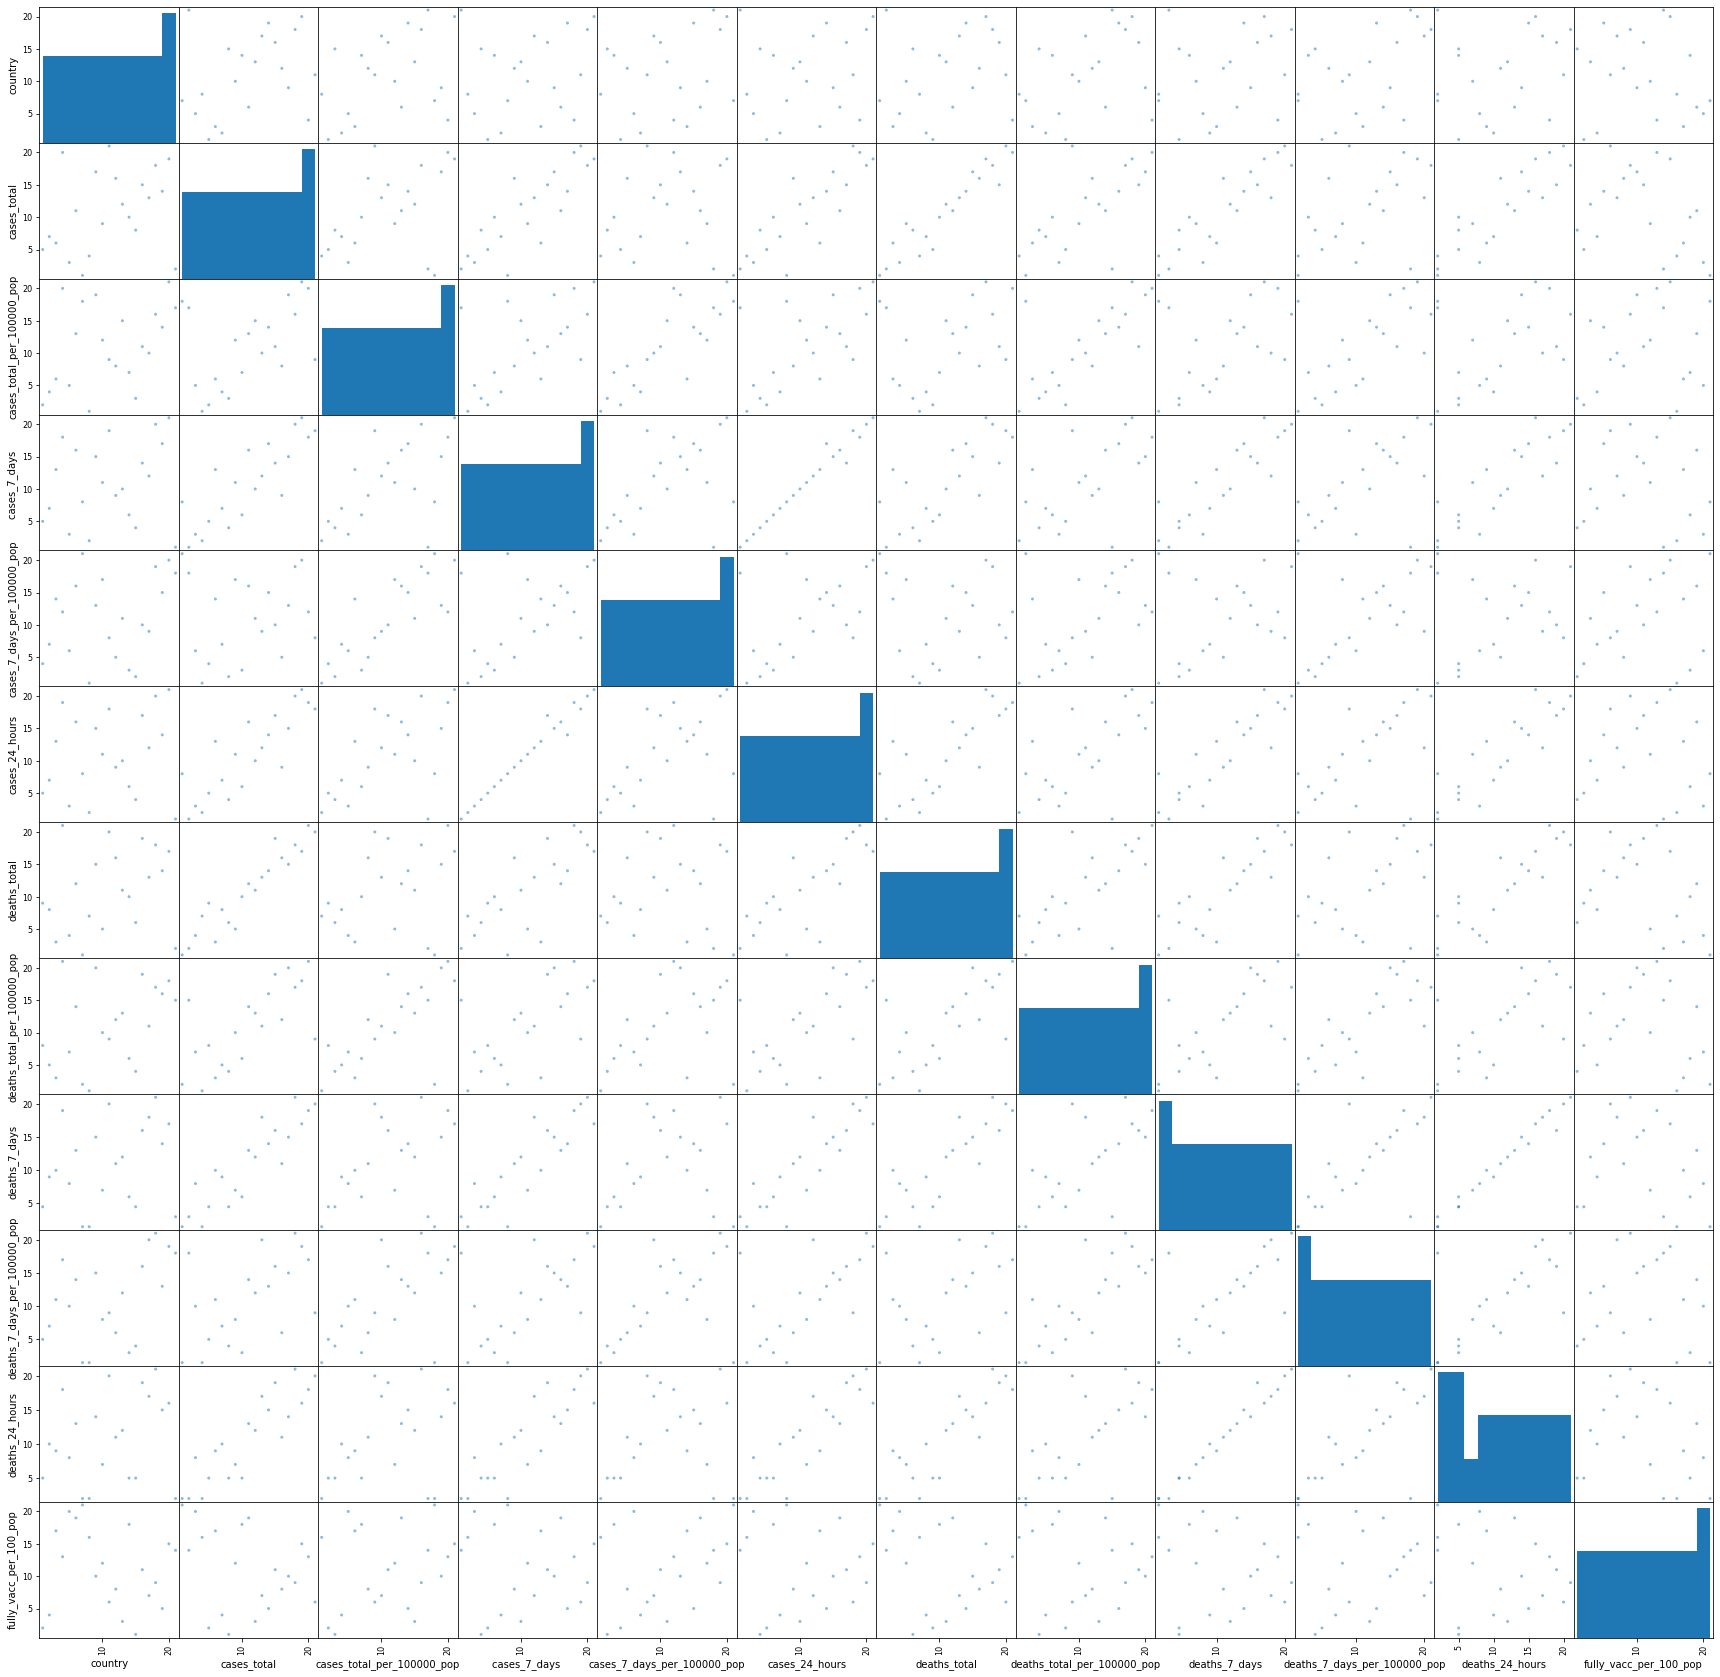

In [9]:
scatter_matrix(30 , 30, dropped_na_df)

# Create a histogram of a column of the dataframe

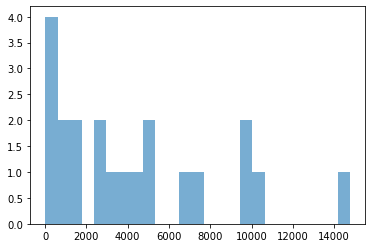

In [10]:
histogram('cases_total_per_100000_pop', data = dropped_na_df)

# Create a pie chart of a column of the dataframe

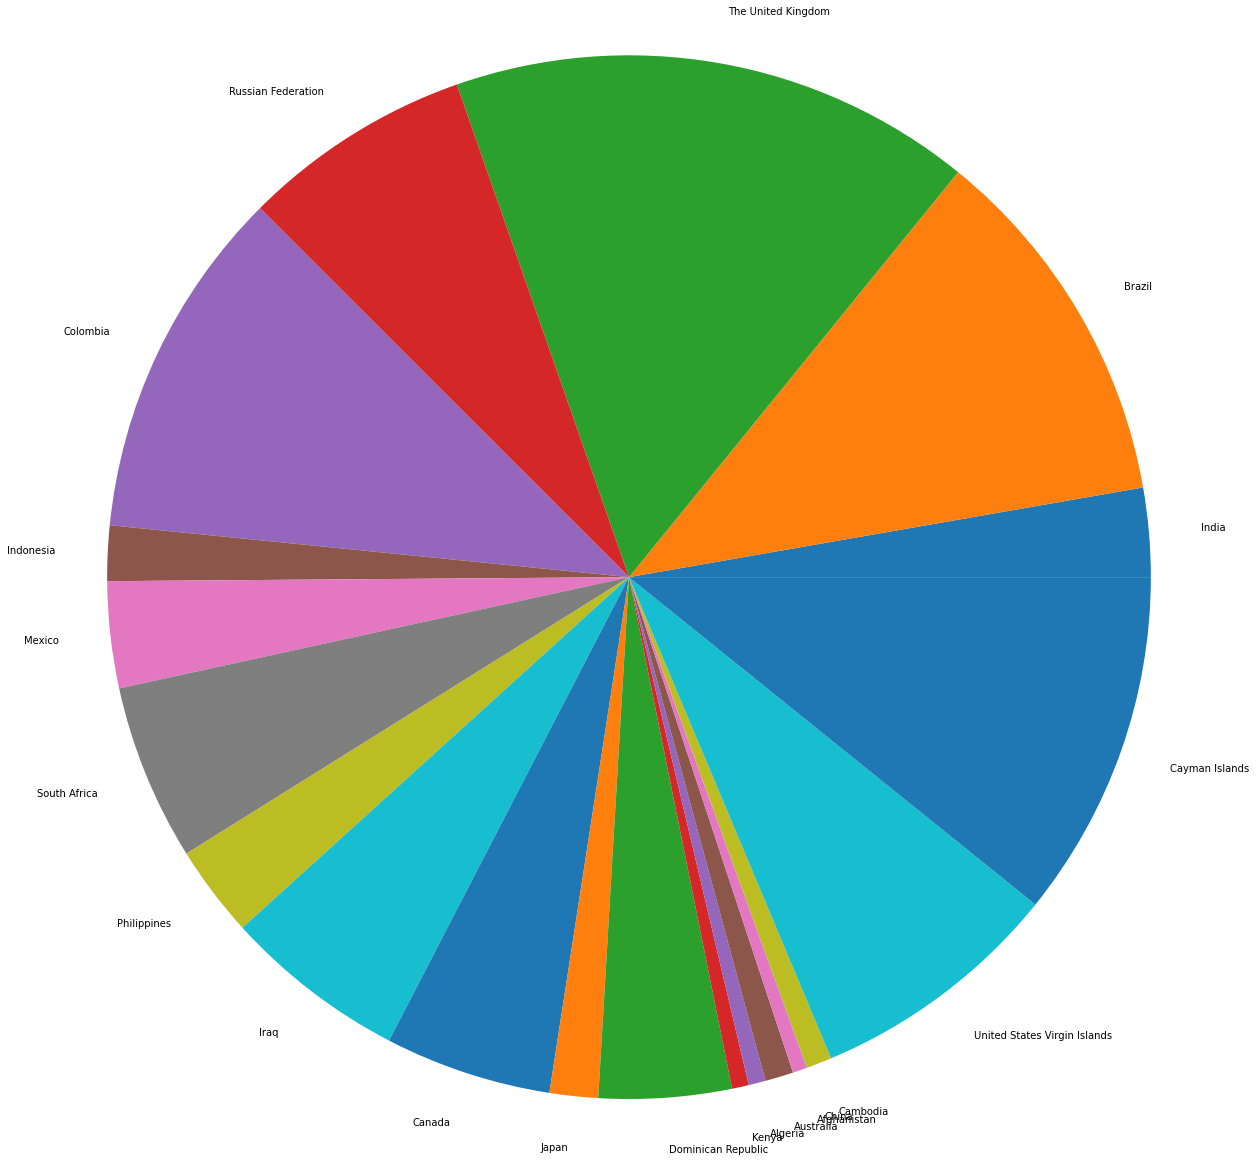

In [11]:
pie_chart (values = dropped_na_df['cases_total_per_100000_pop'], size = 6, labels = dropped_na_df['country'])

# Create a bar chart of a column of the dataframe

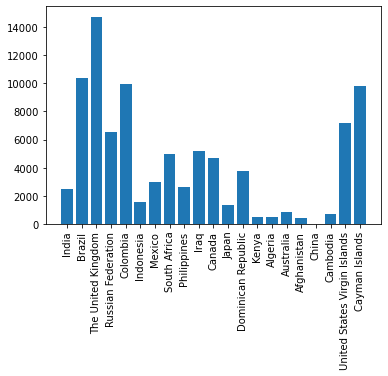

<Figure size 1080x432 with 0 Axes>

In [12]:
bar_graph(dropped_na_df['country'], dropped_na_df['cases_total_per_100000_pop'], )

In [13]:
from test_functions import test_rank_data 
from test_functions import test_stats_covid_data 
from test_functions import test_ttest 

In [14]:
test_rank_data()

In [15]:
test_stats_covid_data()

In [16]:
test_ttest()

In [17]:
!pytest test_functions.py

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: /home/awen/Project_COGS18_FA21
plugins: anyio-3.2.1
collected 3 items                                                              

test_functions.py ...                                                    [100%]

============================== 3 passed in 1.24s ===============================


#### Extra Credit (*optional*)

I have no Python background; this class was my first time doing any type of coding! In my project, I learned methods and functions in pandas and matplotlib not covered in class including dropping Nas in a dataframe, ranking a dataframe, creating a scatterplot matrix, creating a pie chart, and creating a bar chart. 